In [2]:
from warnings import warn
import tifffile
import itkwidgets
import gputools
import pathlib
import ipywidgets as widgets
from colorama import Fore, Back, Style
from interactive_tools import find_podocyte_labels, remove_labels_by_vol

# Set folder to look for files in

In [3]:
basefolder = "../CroppedPodos"

# Find files and present selection widget

In [4]:

p = pathlib.Path(basefolder)
files = list(map(str,(list(p.rglob("*.tif")))))
files = tifffile.natural_sorted(files)
selection = widgets.SelectMultiple(options=files, layout=widgets.Layout(width='800px'))
selection

SelectMultiple(layout=Layout(width='800px'), options=('..\\CroppedPodos\\1642 Cropped\\1642  Glom 1.tif', '..\…

# Set Processing Parameters

Parameter documentation:

### Method

*distance*: threshold the podocyte channel to generate a binary mask, then perform distance transform and use maxima of distance transforms as seed points to split the blobs

*hmax*: find the prominent local maxima in the podocyte channel (assuming these correspond with podocyte centres, the use these as seed points for the watershed transform. 

### hval threshold

Relevant for method *hmax* only: sensitivity of maximum detection. The higher the value the more pronounced the maxima have to be to be picked up.

### Threshold adjust

Relevant only for method *distance*. The algorithm determines an initial intensity threshold to distinguish between podocytes and background. Sometimes the automated guess for the threshold is too high/too low. The threshold adjustment factor modifies the threshold by the given factor.

### Filter by number of voxels

Only retain detected podocyte candidate objects with a volume that falls within the given min/max range of voxels. Removes all objects outside of this range.

In [5]:
# TODO set parameters
from interactive_widgets import method_select, hval_slider, thresh_slider, vol_range
widgets.VBox([method_select, hval_slider, thresh_slider, vol_range])

# Generate processing code

Given the selected files and parameters, generate procssing code to be executed.
The processing code can be saved to make this reproducible (the state of the file selection and parameter widgets is volatile between sessions).

# Process all selected files
Execute processing code generated above

Processing ..\CroppedPodos\1642 Cropped\1642  Glom 11.tif
Reading stack
74.11574
74.11574
adjusted threshold : 18.528934478759766


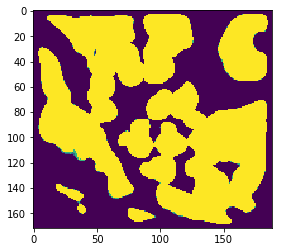

found [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112] seed points
found [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112] podocytes
found [ 75  76  77  78  79  80  82  83  84  85  86

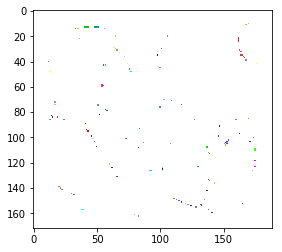

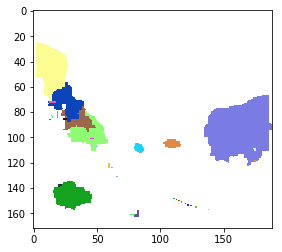

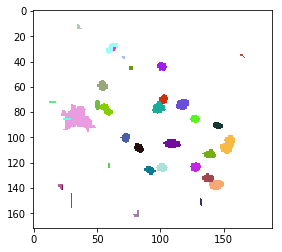

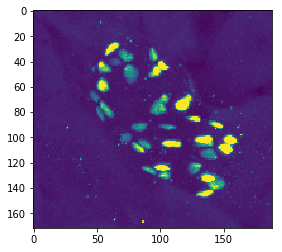

(90, 2, 172, 189)


In [8]:
for file in selection.value:
    print(Fore.BLACK + Back.RED + f"Processing {file}" + Style.RESET_ALL)
    print(Fore.BLACK + Back.YELLOW + f"Reading stack" + Style.RESET_ALL)
    stack = tifffile.imread(file)
    glom = stack[:,0,...]
    podo = stack[:,1,...]
    podo_canditates_label = find_podocyte_labels(podo,
                                                 thresh_adjust=thresh_slider.value,
                                                 h_val=hval_slider.value,
                                                 method=method_select.value, 
                                                 max_vol=vol_range.value[1])
    print (stack.shape)